### 查看Pytorch中可以使用的芯片加速

In [1]:
import pandas as pd
import torch

['ContextProp',
 'PropModule',
 '__allow_nonbracketed_mutation',
 '__allow_nonbracketed_mutation_flag',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'contextmanager',
 'cuda',
 'cudnn',
 'disable_global_flags',
 'flags_frozen',
 'mkl',
 'mkldnn',
 'openmp',
 'quantized',
 'types']

### 简单神经网络模型

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 卷积运算
            nn.ReLU(),  # 激活函数
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten()  # 把2维输出结果拉伸
        )
        # 计算最后一层卷积层的输出尺寸是多少，然后用这个尺寸来定义全连接层的输入
        # 假设输入图像大小为3x32x32
        input_size = 32
        for _ in range(3):  # 三次最大池化，每次尺寸减半
            input_size = input_size // 2
        self.classifier = nn.Sequential(
            nn.Linear(128 * input_size * input_size, 1024),  # 全连接层
            nn.ReLU(),  # 激活函数
            nn.Linear(1024, 512),  # 全连接层
            nn.ReLU(),  # 激活函数
            nn.Linear(512, 256),  # 全连接层
            nn.ReLU(),  # 激活函数
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



CIFAR-10（Canadian Institute for Advanced Research 10）是一个广泛使用的图像分类数据集，用于计算机视觉中的图像分类和模型训练任务。它由10个不同的类别组成，每个类别包含大约6,000张32x32像素的彩色图像。

CIFAR-10 数据集中的类别包括：
- 飞机（airplane）
- 汽车（automobile）
- 鸟类（bird）
- 猫（cat）
- 鹿（deer）
- 狗（dog）
- 蛙类（frog）
- 马（horse）
- 船（ship）
- 卡车（truck）

CIFAR-10 数据集被广泛用于测试和评估图像分类模型的性能和准确度。每个图像都被分配一个正确的标签，从0到9的整数表示类别。

该数据集的特点是图像分辨率相对较低，仅为32x32像素，但包含了多个不同的类别和复杂度。由于图像较小且具有较低的分辨率，CIFAR-10 数据集通常用于快速验证和原型开发，以便更快地测试和训练模型。

In [3]:
# 加载数据集
train_dataset = datasets.CIFAR10(root='data/', 
                                 train=True, 
                                 transform=transforms.ToTensor(), 
                                 download=True)
test_dataset = datasets.CIFAR10(root='data/', 
                                train=False, 
                                transform=transforms.ToTensor(), 
                                download=True)

num_epochs = 10
batch_size = 128
learning_rate = 0.001

# 定义数据加载器 -- 用于批次处理和图像变换
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
# 创建模型实例
device = "cuda:1"

model = CNN(num_classes=10).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss() # 多分类； BCELoss - Binary Cross Entropy二分类
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 打印训练信息
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/391], Loss: 1.9519
Epoch [1/10], Step [200/391], Loss: 1.8089
Epoch [1/10], Step [300/391], Loss: 1.5174
Epoch [2/10], Step [100/391], Loss: 1.3116
Epoch [2/10], Step [200/391], Loss: 1.3250
Epoch [2/10], Step [300/391], Loss: 1.1812
Epoch [3/10], Step [100/391], Loss: 1.2143
Epoch [3/10], Step [200/391], Loss: 0.8960
Epoch [3/10], Step [300/391], Loss: 0.8533
Epoch [4/10], Step [100/391], Loss: 0.9236
Epoch [4/10], Step [200/391], Loss: 0.7090
Epoch [4/10], Step [300/391], Loss: 0.5243
Epoch [5/10], Step [100/391], Loss: 0.7573
Epoch [5/10], Step [200/391], Loss: 0.7033
Epoch [5/10], Step [300/391], Loss: 0.8003
Epoch [6/10], Step [100/391], Loss: 0.6660
Epoch [6/10], Step [200/391], Loss: 0.6422
Epoch [6/10], Step [300/391], Loss: 0.6467
Epoch [7/10], Step [100/391], Loss: 0.6424
Epoch [7/10], Step [200/391], Loss: 0.4032
Epoch [7/10], Step [300/391], Loss: 0.6238
Epoch [8/10], Step [100/391], Loss: 0.4028
Epoch [8/10], Step [200/391], Loss: 0.3308
Epoch [8/10

In [7]:
images.shape

torch.Size([16, 3, 32, 32])

In [5]:
# 测试模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 75.29%


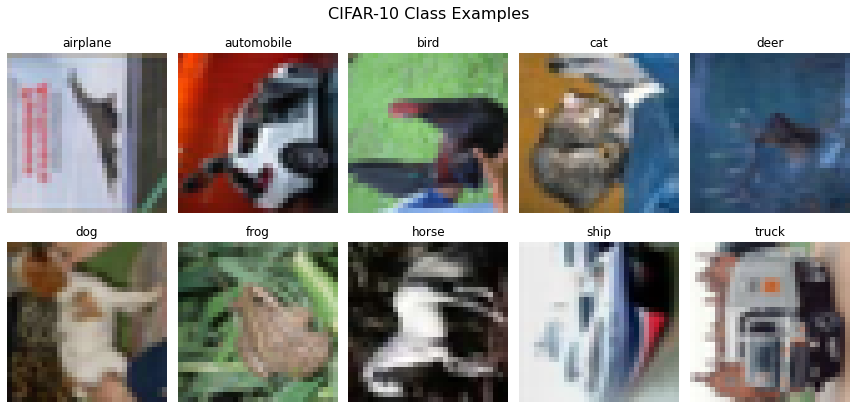

In [6]:
# 获取类别名称
import matplotlib.pyplot as plt

class_names = test_dataset.classes

# 创建子图网格
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('CIFAR-10 Class Examples', fontsize=16)

# 遍历每个类别
for i in range(len(class_names)):
    # 获取第一个属于该类别的图像
    for image, label in test_dataset:
        if label == i:
            # 显示图像
            ax = axs[i // 5, i % 5]
            ax.imshow(torch.transpose(image, 0, 2))
            ax.set_title(class_names[i])
            ax.axis('off')
            break

# 调整子图之间的间距
plt.tight_layout()

# 展示图像
plt.show()